# Objetivo:

1)Mostre médias, medianas, modas e desvio padrão

2)Mostre números mínimos e máximos, de pelo menos duas variáveis, e suas amplitudes

3)Pelo menos dois gráficos de Barras

4)Pelo menos dois gráficos de Linhas

5)Pelo menos dois gráficos Blox Pot

6)Pelo menos dois gráficos de Correlação

Para cada item acima justifique as informações escolhidas e explique os resultados obtidos
(considerando os conceitos discutidos em sala de aula).



**Precisamos definir dados a serem analisados** <br />
Enquanto eles não foram definidos pela equipe, comecei a fazer uma análise para verificar se a relação entre alunos ingressantes x concluintes é diferente nas regiões do Brasil. 
<br /> **Sugestões de dados a serem analisados:::::** <br />



In [226]:
# Funções para visualização dos dados

from matplotlib import pyplot as plt
import numpy as np

def generate_bar_graph(x, y, xlabel,ylabel):
    plt.bar(x, y)
    plt.title("Grafico de Barra")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def generate_line_graph(x, y, xlabel, ylabel):
    plt.plot(x, y, color="green", marker="o", linestyle='solid')
    plt.title("Grafico de linha")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def get_media(array):
    return np.mean(array)

def get_median(array):
    return np.median(array)

def get_mode(array):
    return np.bincount(array).argmax()

def plota_barra_linha(x, y, z):
    plt.bar(x, y, color="black", align='center')                 
    plt.plot(x, z, color="green", marker='o', linestyle='--', linewidth=2)
    plt.show()  

In [227]:
import unicodecsv

#Aqui são abertos os arquivos de matriculas e concluintes e transformados em uma lista de dicionarios, cada um

ingressantes_filename = 'dados/ingressantes.dll'
concluintes_filename = 'dados/concluintes.dll'


def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
ingressantes = read_csv(ingressantes_filename)
concluintes = read_csv(concluintes_filename)
    
print(ingressantes[0])
concluintes[55]

OrderedDict([('\ufeffAno Censo', '2013'), ('Número de Ingressos', '9158'), ('Id Categoria Administrativa', '1'), ('Sub Categoria Administrativa', 'FEDERAL'), ('Categoria Administrativa', 'PÚBLICA'), ('Região', 'CENTRO-OESTE'), ('UF', 'DISTRITO FEDERAL')])


OrderedDict([('\ufeffAno Censo', '2013'),
             ('Número de Concluintes', '7522'),
             ('Id Categoria Administrativa', '1'),
             ('Categoria Administrativa', 'PÚBLICA'),
             ('Sub Categoria Administrativa', 'FEDERAL'),
             ('Abrangência Geográfica (Curso)', 'CENTRO-OESTE'),
             ('UF - Curso', ''),
             ('Região - Região', 'CENTRO-OESTE'),
             ('Região', 'CENTRO-OESTE'),
             ('UF', 'GOIÁS')])

In [228]:
# Organizando os dados

# Arrumando os tipos de dados e apagando colunas repetidas ou cujo valor vai ser sempre 0

for c in concluintes:
    c['Número de Concluintes'] = int(c['Número de Concluintes'])
    c['Ano Censo'] = c['\ufeffAno Censo']
    del c['\ufeffAno Censo']
    del c['Região - Região'] 
    del c['UF - Curso']
    del c['Id Categoria Administrativa']


     
for i in ingressantes:
    i['Número de Ingressos'] = int(i['Número de Ingressos'])
    i['Ano Censo'] = i['\ufeffAno Censo']
    del i['\ufeffAno Censo']
    del i['Id Categoria Administrativa']
    


In [229]:
ingressantes[30]

OrderedDict([('Número de Ingressos', 2391),
             ('Sub Categoria Administrativa', 'ESTADUAL'),
             ('Categoria Administrativa', 'PÚBLICA'),
             ('Região', 'CENTRO-OESTE'),
             ('UF', 'MATO GROSSO DO SUL'),
             ('Ano Censo', '2013')])

In [230]:
concluintes[30]

OrderedDict([('Número de Concluintes', 4592),
             ('Categoria Administrativa', 'PÚBLICA'),
             ('Sub Categoria Administrativa', 'FEDERAL'),
             ('Abrangência Geográfica (Curso)', 'BRASIL'),
             ('Região', 'CENTRO-OESTE'),
             ('UF', 'MATO GROSSO DO SUL'),
             ('Ano Censo', '2013')])

In [231]:
sucess = 0
fail = 0
        
print(len(concluintes))
print(len(ingressantes))
print (sucess)
print (fail)

356
105
0
0


In [232]:
estados = []
for concluinte in concluintes:
    if(concluinte['UF'] not in estados):
        estados.append(concluinte['UF'])
estados.sort()

estados_id = range(len(estados))
estados




['ACRE',
 'ALAGOAS',
 'AMAPÁ',
 'AMAZONAS',
 'BAHIA',
 'CEARÁ',
 'DISTRITO FEDERAL',
 'ESPÍRITO SANTO',
 'GOIÁS',
 'MARANHÃO',
 'MATO GROSSO',
 'MATO GROSSO DO SUL',
 'MINAS GERAIS',
 'PARANÁ',
 'PARAÍBA',
 'PARÁ',
 'PERNAMBUCO',
 'PIAUÍ',
 'RIO DE JANEIRO',
 'RIO GRANDE DO NORTE',
 'RIO GRANDE DO SUL',
 'RONDÔNIA',
 'RORAIMA',
 'SANTA CATARINA',
 'SERGIPE',
 'SÃO PAULO',
 'TOCANTINS']

In [235]:
concluintes_publica_num = {}
concluintes_privada_num = {}

for e in estados:
    concluintes_publica_num[e] = 0
    concluintes_privada_num[e]= 0

for concluinte in concluintes:
    estado = concluinte['UF']
    tipo = concluinte['Categoria Administrativa']
    if(tipo == 'PUBLICA'):
        concluintes_publica_num[estado] = concluintes_publica_num[estado] + concluinte['Número de Concluintes']
    elif(tipo == 'PRIVADA'):
        concluintes_privada_num[estado] = concluintes_privada_num[estado] + concluinte['Número de Concluintes']


a = list(concluintes_publica_num.values())
b = list(concluintes_privada_num.values())

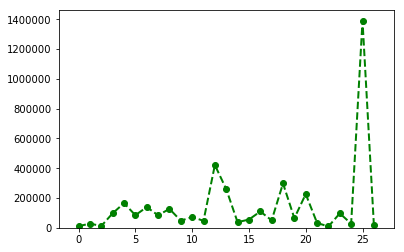

In [236]:
plota_barra_linha(range(len(a)), a, b)